<a href="https://colab.research.google.com/github/saitejasri1/The-pokemon-Dataset/blob/main/The_Pokemon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58748 sha256=784f6ce7b9191ec2edd9d2abdc6898d05fbb2eaca1c497e56ef627b77b8552e2
  Stored in directory: /root/.cache/pip/wheels/63/88/77/b4131110ea4094540f7b47c6d62a649807d7e94800da5eab0b
Successfully built spark


In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=29ba03f3328b6b829d16be6b105983dd4c3a54cd446b969cbf04662e3855a70e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import streamlit as st
import pandas as pd

# Create a DataFrame for your data
data = pd.DataFrame({
    'X': [0, 1, 2, 3, 4],
    'Y': [0, 2, 4, 6, 8]
})

# Use the DataFrame in st.line_chart
st.title('My Streamlit App')
st.write('This is a simple line chart:')
st.line_chart(data)


DeltaGenerator()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Pokemon Analysis") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv('pokemon_data_science_-_pokemon_data_science.csv', header=True, inferSchema=True)


In [ ]:
df.show()

+------+----------+------+------+-----+---+------+-------+------+------+-----+----------+-----------+------+---------+-------+-----------+-----------+----------------+--------+---------+----------+---------------+
|Number|      Name|Type_1|Type_2|Total| HP|Attack|Defense|Sp_Atk|Sp_Def|Speed|Generation|isLegendary| Color|hasGender|Pr_Male|Egg_Group_1|Egg_Group_2|hasMegaEvolution|Height_m|Weight_kg|Catch_Rate|     Body_Style|
+------+----------+------+------+-----+---+------+-------+------+------+-----+----------+-----------+------+---------+-------+-----------+-----------+----------------+--------+---------+----------+---------------+
|     1| Bulbasaur| Grass|Poison|  318| 45|    49|     49|    65|    65|   45|         1|      false| Green|     true|  0.875|    Monster|      Grass|           false|    0.71|      6.9|        45|      quadruped|
|     2|   Ivysaur| Grass|Poison|  405| 60|    62|     63|    80|    80|   60|         1|      false| Green|     true|  0.875|    Monster|      

In [ ]:
df.createOrReplaceTempView("PokemonStats")

In [ ]:
result = spark.sql("SELECT * FROM PokemonStats")
result.show()

+------+----------+------+------+-----+---+------+-------+------+------+-----+----------+-----------+------+---------+-------+-----------+-----------+----------------+--------+---------+----------+---------------+
|Number|      Name|Type_1|Type_2|Total| HP|Attack|Defense|Sp_Atk|Sp_Def|Speed|Generation|isLegendary| Color|hasGender|Pr_Male|Egg_Group_1|Egg_Group_2|hasMegaEvolution|Height_m|Weight_kg|Catch_Rate|     Body_Style|
+------+----------+------+------+-----+---+------+-------+------+------+-----+----------+-----------+------+---------+-------+-----------+-----------+----------------+--------+---------+----------+---------------+
|     1| Bulbasaur| Grass|Poison|  318| 45|    49|     49|    65|    65|   45|         1|      false| Green|     true|  0.875|    Monster|      Grass|           false|    0.71|      6.9|        45|      quadruped|
|     2|   Ivysaur| Grass|Poison|  405| 60|    62|     63|    80|    80|   60|         1|      false| Green|     true|  0.875|    Monster|      

In [ ]:
result = spark.sql("SELECT distinct name, type_1 FROM PokemonStats")
result.show()

+---------+--------+
|     name|  type_1|
+---------+--------+
|  Persian|  Normal|
| Clamperl|   Water|
|   Goodra|  Dragon|
| Squirtle|   Water|
|  Skorupi|  Poison|
|   Tynamo|Electric|
|  Geodude|    Rock|
|   Dodrio|  Normal|
| Garbodor|  Poison|
| Nosepass|    Rock|
| Staravia|  Normal|
| Darumaka|    Fire|
|  Jolteon|Electric|
|   Ledyba|     Bug|
|Stoutland|  Normal|
| Beheeyem| Psychic|
|  Tropius|   Grass|
|Carnivine|   Grass|
|  Honedge|   Steel|
|Hitmonlee|Fighting|
+---------+--------+
only showing top 20 rows



In [ ]:
result = spark.sql("SELECT distinct type_2 FROM PokemonStats")
result.show()

+--------+
|  type_2|
+--------+
|   Water|
|  Poison|
|   Steel|
|    Rock|
|     Ice|
|   Ghost|
|   Fairy|
| Psychic|
|  Dragon|
|  Flying|
|     Bug|
|Electric|
|    Fire|
|  Ground|
|    Dark|
|Fighting|
|   Grass|
|  Normal|
|    NULL|
+--------+



In [ ]:
result = spark.sql("""
                   WITH RankedPokemon AS (
    SELECT
        Number,
        Name,
        Type_1,
        Type_2,
        Total,
        RANK() OVER (PARTITION BY Type_1 ORDER BY Total DESC) AS Type1_Rank
    FROM
        PokemonStats)

        SELECT
    Number,
    Name,
    Type_1,
    Type_2,
    Total
    FROM
        RankedPokemon
    WHERE
        Type1_Rank <= 3;""")
result.show()

+------+----------+--------+--------+-----+
|Number|      Name|  Type_1|  Type_2|Total|
+------+----------+--------+--------+-----+
|   649|  Genesect|     Bug|   Steel|  600|
|   637| Volcarona|     Bug|    Fire|  550|
|   469|   Yanmega|     Bug|  Flying|  515|
|   717|   Yveltal|    Dark|  Flying|  680|
|   491|   Darkrai|    Dark|    NULL|  600|
|   635| Hydreigon|    Dark|  Dragon|  600|
|   384|  Rayquaza|  Dragon|  Flying|  680|
|   643|  Reshiram|  Dragon|    Fire|  680|
|   644|    Zekrom|  Dragon|Electric|  680|
|   145|    Zapdos|Electric|  Flying|  580|
|   243|    Raikou|Electric|    NULL|  580|
|   642| Thundurus|Electric|  Flying|  580|
|   716|   Xerneas|   Fairy|    NULL|  680|
|   671|   Florges|   Fairy|    NULL|  552|
|   468|  Togekiss|   Fairy|  Flying|  545|
|   448|   Lucario|Fighting|   Steel|  525|
|   620|  Mienshao|Fighting|    NULL|  510|
|    68|   Machamp|Fighting|    NULL|  505|
|   534|Conkeldurr|Fighting|    NULL|  505|
|   250|     Ho-Oh|    Fire|  Fl

1. SQL Dialect You Are Using:
Spark SQL: The query is written for use in Spark SQL, which is part of Apache Spark, a powerful engine for large-scale data processing and analysis. Spark SQL extends the capabilities of traditional SQL with optimizations and functions suitable for big data processing.

2. The SQL Query Used:
sql
Copy code
WITH RankedPokemon AS (
    SELECT
        Number,
        Name,
        Type_1,
        Type_2,
        Total,
        RANK() OVER (PARTITION BY Type_1 ORDER BY Total DESC) AS Type1_Rank
    FROM
        PokemonStats
)
SELECT
    Number,
    Name,
    Type_1,
    Type_2,
    Total
FROM
    RankedPokemon
WHERE
    Type1_Rank <= 3;

3. The Returned Result:
Your query returns a table with columns Number, Name, Type_1, Type_2, and Total, showing the top 3 Pokémon for each primary type based on their total stats. The sample output you've provided illustrates this perfectly, listing Pokémon like Genesect, Volcarona, and Yanmega for the Bug type, and similarly for other types.



# Question 2

Step 1: Import necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Aggregate Statistics by Pokémon Type
We'll calculate the average total stats, attack, and defense for each primary Pokémon type (Type_1). This gives us a good indication of overall strength.

In [ ]:
type_aggregates = df.groupBy("Type_1").agg(
    F.avg("Total").alias("Avg_Total"),
    F.avg("Attack").alias("Avg_Attack"),
    F.avg("Defense").alias("Avg_Defense")
).orderBy("Avg_Total", ascending=False)

In [ ]:

type_aggregates.show()

+--------+------------------+------------------+------------------+
|  Type_1|         Avg_Total|        Avg_Attack|       Avg_Defense|
+--------+------------------+------------------+------------------+
|  Dragon| 501.9583333333333|           102.625|            79.125|
|   Steel|464.90909090909093| 83.54545454545455| 119.4090909090909|
|  Flying| 453.3333333333333| 71.66666666666667|61.666666666666664|
|    Fire|443.02127659574467|  82.2127659574468|  64.8936170212766|
| Psychic|442.48936170212767|61.276595744680854| 65.04255319148936|
|    Rock| 437.8048780487805| 88.46341463414635|  99.7560975609756|
|    Dark|            434.75|             86.25| 67.92857142857143|
|     Ice| 427.0869565217391| 70.69565217391305| 71.04347826086956|
|   Ghost| 423.6521739130435| 67.52173913043478| 75.95652173913044|
|  Ground|             421.0|              91.3| 82.16666666666667|
|Electric|420.69444444444446| 67.77777777777777|59.083333333333336|
|   Water|             417.2| 71.04761904761905|

Step 3: Collect Data for Visualization
For visualization, we'll need to collect the aggregated data back to the driver. Be cautious with .collect() for larger datasets to avoid memory issues.

type_aggregates

In [ ]:
type_stats_pd = type_aggregates.toPandas()


In [ ]:
type_stats_pd

Type_1   Avg_Total  Avg_Attack  Avg_Defense
0     Dragon  501.958333  102.625000    79.125000
1      Steel  464.909091   83.545455   119.409091
2     Flying  453.333333   71.666667    61.666667
3       Fire  443.021277   82.212766    64.893617
4    Psychic  442.489362   61.276596    65.042553
5       Rock  437.804878   88.463415    99.756098
6       Dark  434.750000   86.250000    67.928571
7        Ice  427.086957   70.695652    71.043478
8      Ghost  423.652174   67.521739    75.956522
9     Ground  421.000000   91.300000    82.166667
10  Electric  420.694444   67.777778    59.083333
11     Water  417.200000   71.047619    70.485714
12     Fairy  413.176471   61.529412    65.705882
13     Grass  409.560606   70.909091    69.363636
14  Fighting  404.360000   94.720000    64.280000
15    Poison  399.142857   74.678571    68.821429
16    Normal  392.161290   71.731183    57.795699
17       Bug  365.126984   65.222222    67.698413

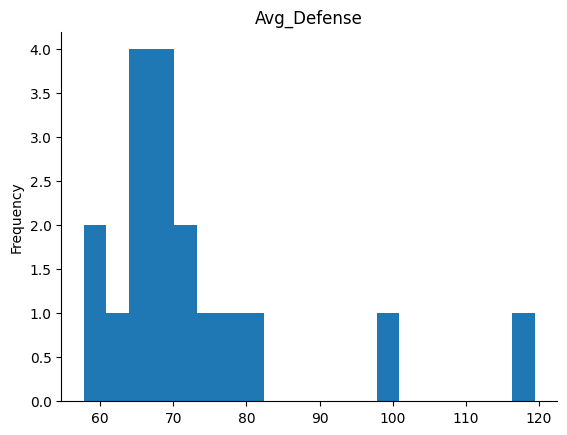

In [ ]:
type_stats_pd['Avg_Defense'].plot(kind='hist', bins=20, title='Avg_Defense')
plt.gca().spines[['top', 'right',]].set_visible(False)

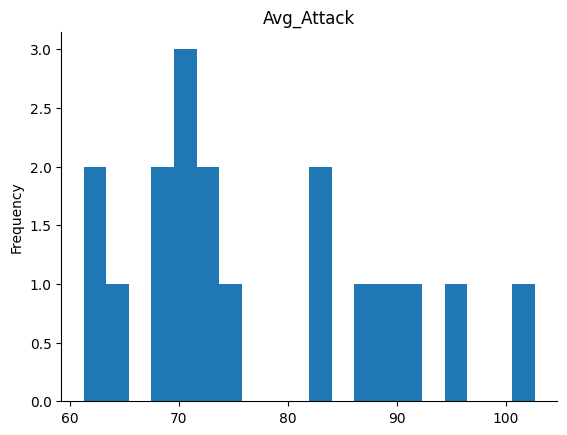

In [ ]:
type_stats_pd['Avg_Attack'].plot(kind='hist', bins=20, title='Avg_Attack')
plt.gca().spines[['top', 'right',]].set_visible(False)

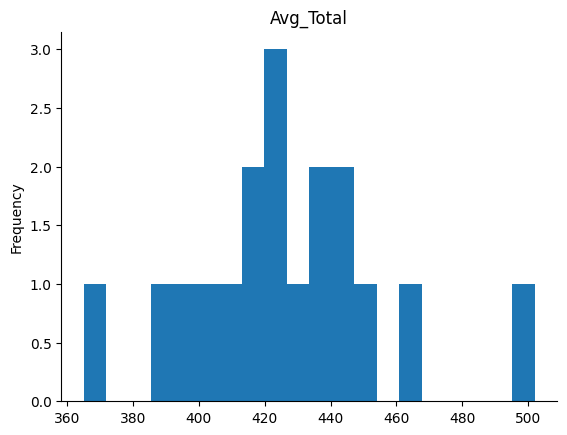

In [ ]:
type_stats_pd['Avg_Total'].plot(kind='hist', bins=20, title='Avg_Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

Step 4: Visualization
We'll create plots to visualize the average total stats, attack, and defense for each type.

<ipython-input-20-d6f643a6147b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Avg_Total", y="Type_1", data=type_stats_pd, palette="cool")


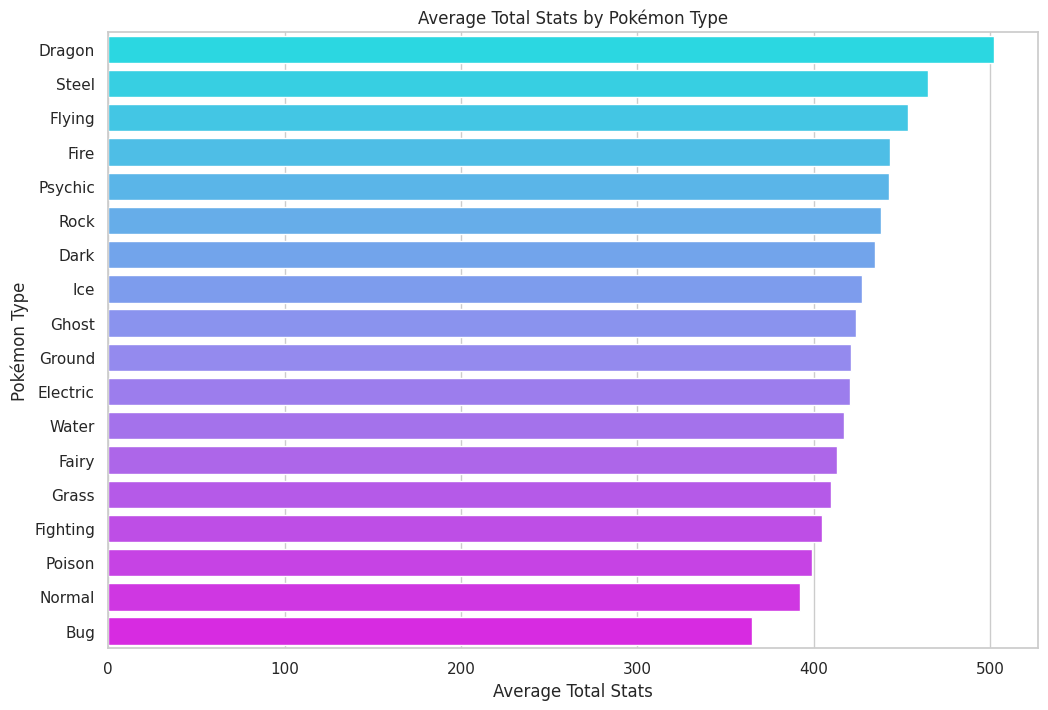

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x="Avg_Total", y="Type_1", data=type_stats_pd, palette="cool")
plt.title('Average Total Stats by Pokémon Type')
plt.xlabel('Average Total Stats')
plt.ylabel('Pokémon Type')
plt.show()

Average Attack and Defense by Type
For a more detailed analysis, let's compare the average attack and defense stats.

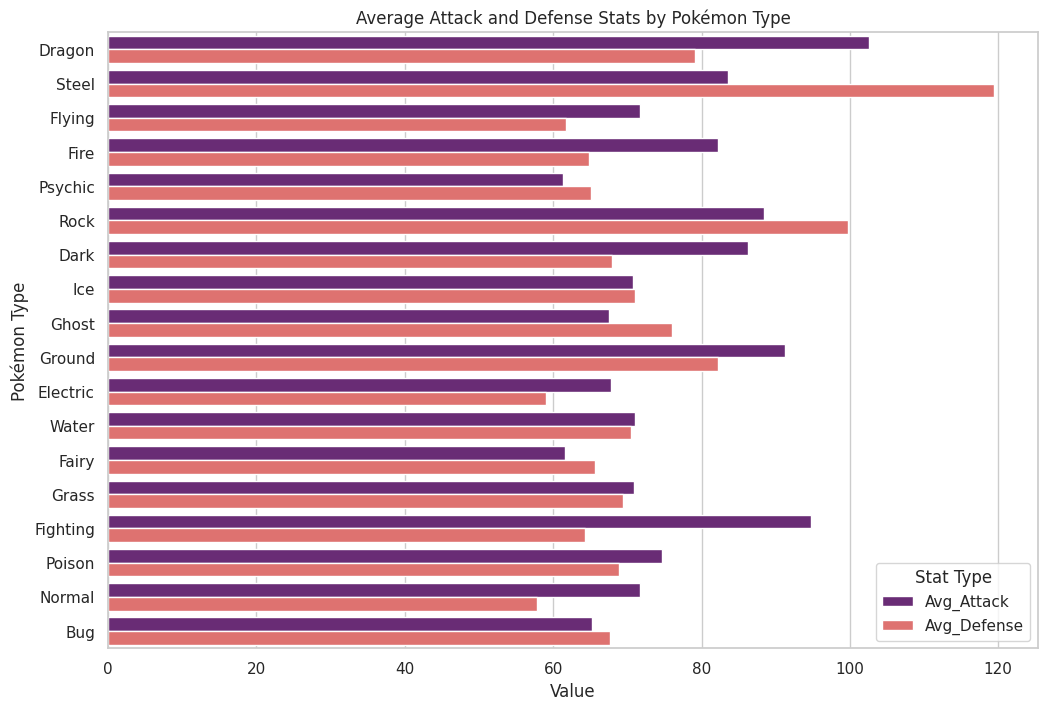

In [ ]:
plt.figure(figsize=(12, 8))
melted_stats_pd = type_stats_pd.melt(id_vars=["Type_1"], value_vars=["Avg_Attack", "Avg_Defense"], var_name="Stat", value_name="Value")
sns.barplot(x="Value", y="Type_1", hue="Stat", data=melted_stats_pd, palette="magma")
plt.title('Average Attack and Defense Stats by Pokémon Type')
plt.xlabel('Value')
plt.ylabel('Pokémon Type')
plt.legend(title='Stat Type')
plt.show()


1.Mean Total Stats by Pokémon Type: This chart shows the average total stats (a combination of HP, Attack, Defense, Special Attack, Special Defense, and Speed) for each Pokémon type. Types with higher mean total stats are generally more versatile and potentially stronger in battles.


2.Mean Attack and Defense Stats by Pokémon Type: The second chart compares the mean attack and defense stats across types, highlighting the offensive and defensive capabilities of each type. A balance of high attack and defense stats can be crucial for both dealing damage and sustaining it during battles.


Conclusion:
Based on these charts, the types with the highest mean total stats and a good balance of attack and defense capabilities would be most suitable for collecting. Dragon type stands out as a strong contender due to its high average in total stats, attack, and defense, making it an excellent choice for battles and raids. Additionally, types like Steel and Psychic also show strong average stats, making them competitive choices.



# Question 4

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Defining dataset

In [ ]:
pokemon_df = pd.read_csv('pokemon_data_science_-_pokemon_data_science.csv')


In [ ]:
pokemon_df.head()

Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45       quadruped  
1             False     0.99      13.0          45       quadruped  
2              True     2.01     100.0          45       quadruped  
3             False     0.61       8.5          45  bipedal_tailed  
4             False     1.09      19.0          45  bipedal_tailed  

[5 rows x 23 columns]

In [ ]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [ ]:
pokemon_df.describe()

Number       Total          HP      Attack     Defense      Sp_Atk  \
count  721.00000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean   361.00000  417.945908   68.380028   75.013870   70.808599   68.737864   
std    208.27906  109.663671   25.848272   28.984475   29.296558   28.788005   
min      1.00000  180.000000    1.000000    5.000000    5.000000   10.000000   
25%    181.00000  320.000000   50.000000   53.000000   50.000000   45.000000   
50%    361.00000  424.000000   65.000000   74.000000   65.000000   65.000000   
75%    541.00000  499.000000   80.000000   95.000000   85.000000   90.000000   
max    721.00000  720.000000  255.000000  165.000000  230.000000  154.000000   

           Sp_Def       Speed  Generation     Pr_Male    Height_m   Weight_kg  \
count  721.000000  721.000000  721.000000  644.000000  721.000000  721.000000   
mean    69.291262   65.714286    3.323162    0.553377    1.144979   56.773370   
std     27.015860   27.277920    1.669873    0.199969    1.044369   89.095667   
min     20.000000    5.000000    1.000000    0.000000    0.100000    0.100000   
25%     50.000000   45.000000    2.000000    0.500000    0.610000    9.400000   
50%     65.000000   65.000000    3.000000    0.500000    0.990000   28.000000   
75%     85.000000   85.000000    5.000000    0.500000    1.400000   61.000000   
max    230.000000  160.000000    6.000000    1.000000   14.500000  950.000000   

       Catch_Rate  
count  721.000000  
mean   100.246879  
std     76.573513  
min      3.000000  
25%     45.000000  
50%     65.000000  
75%    180.000000  
max    255.000000

# Numeric features plot


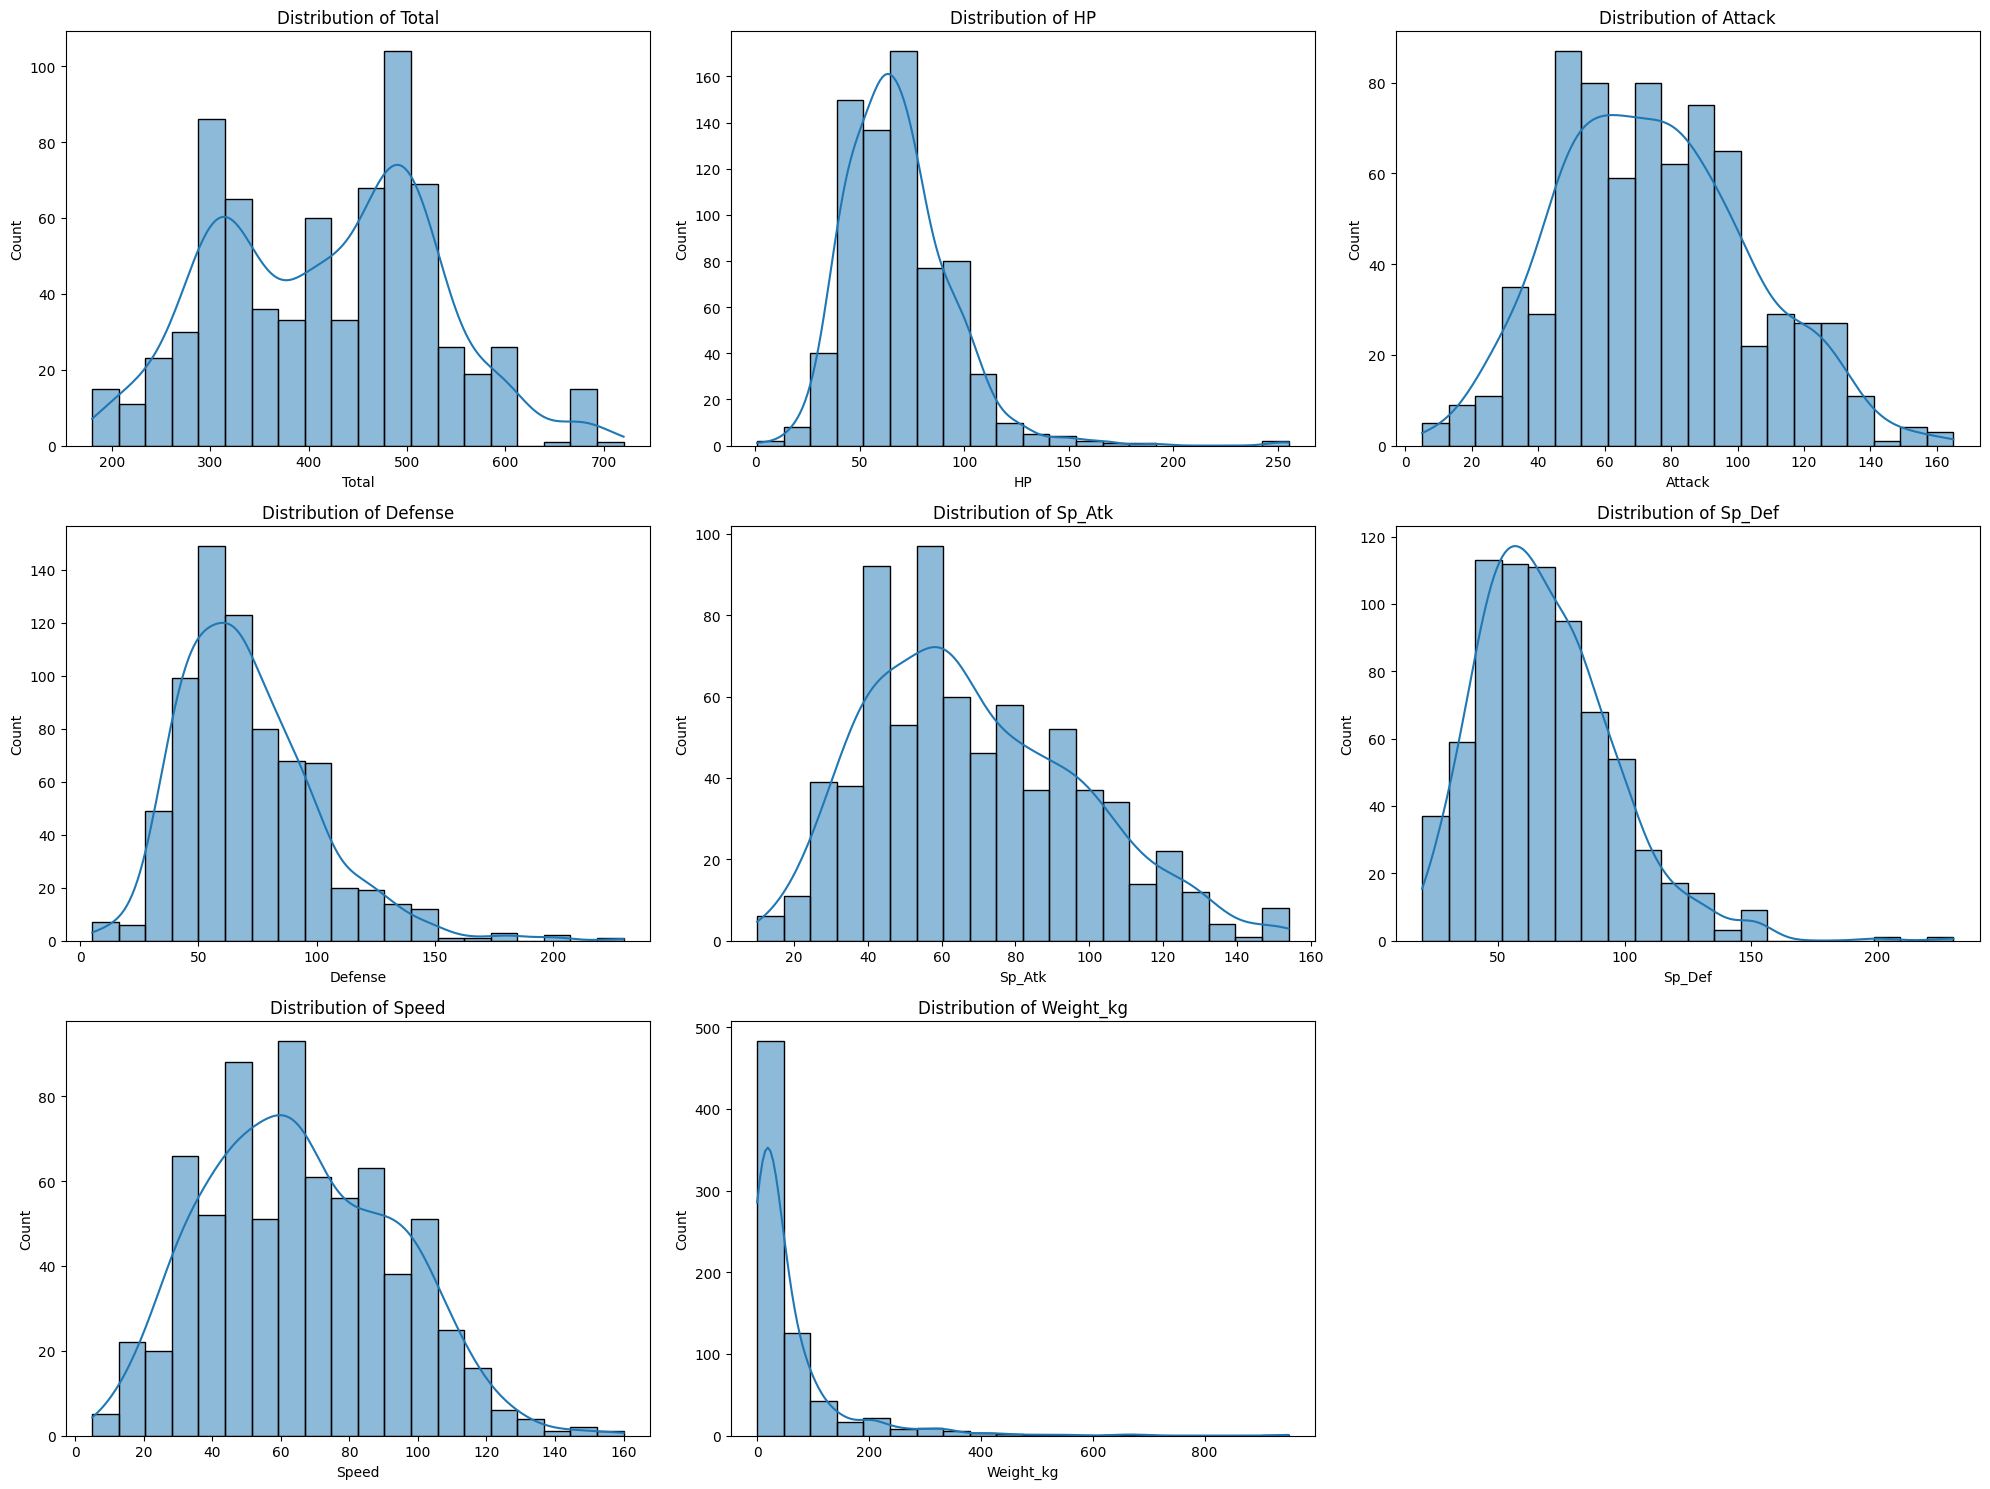

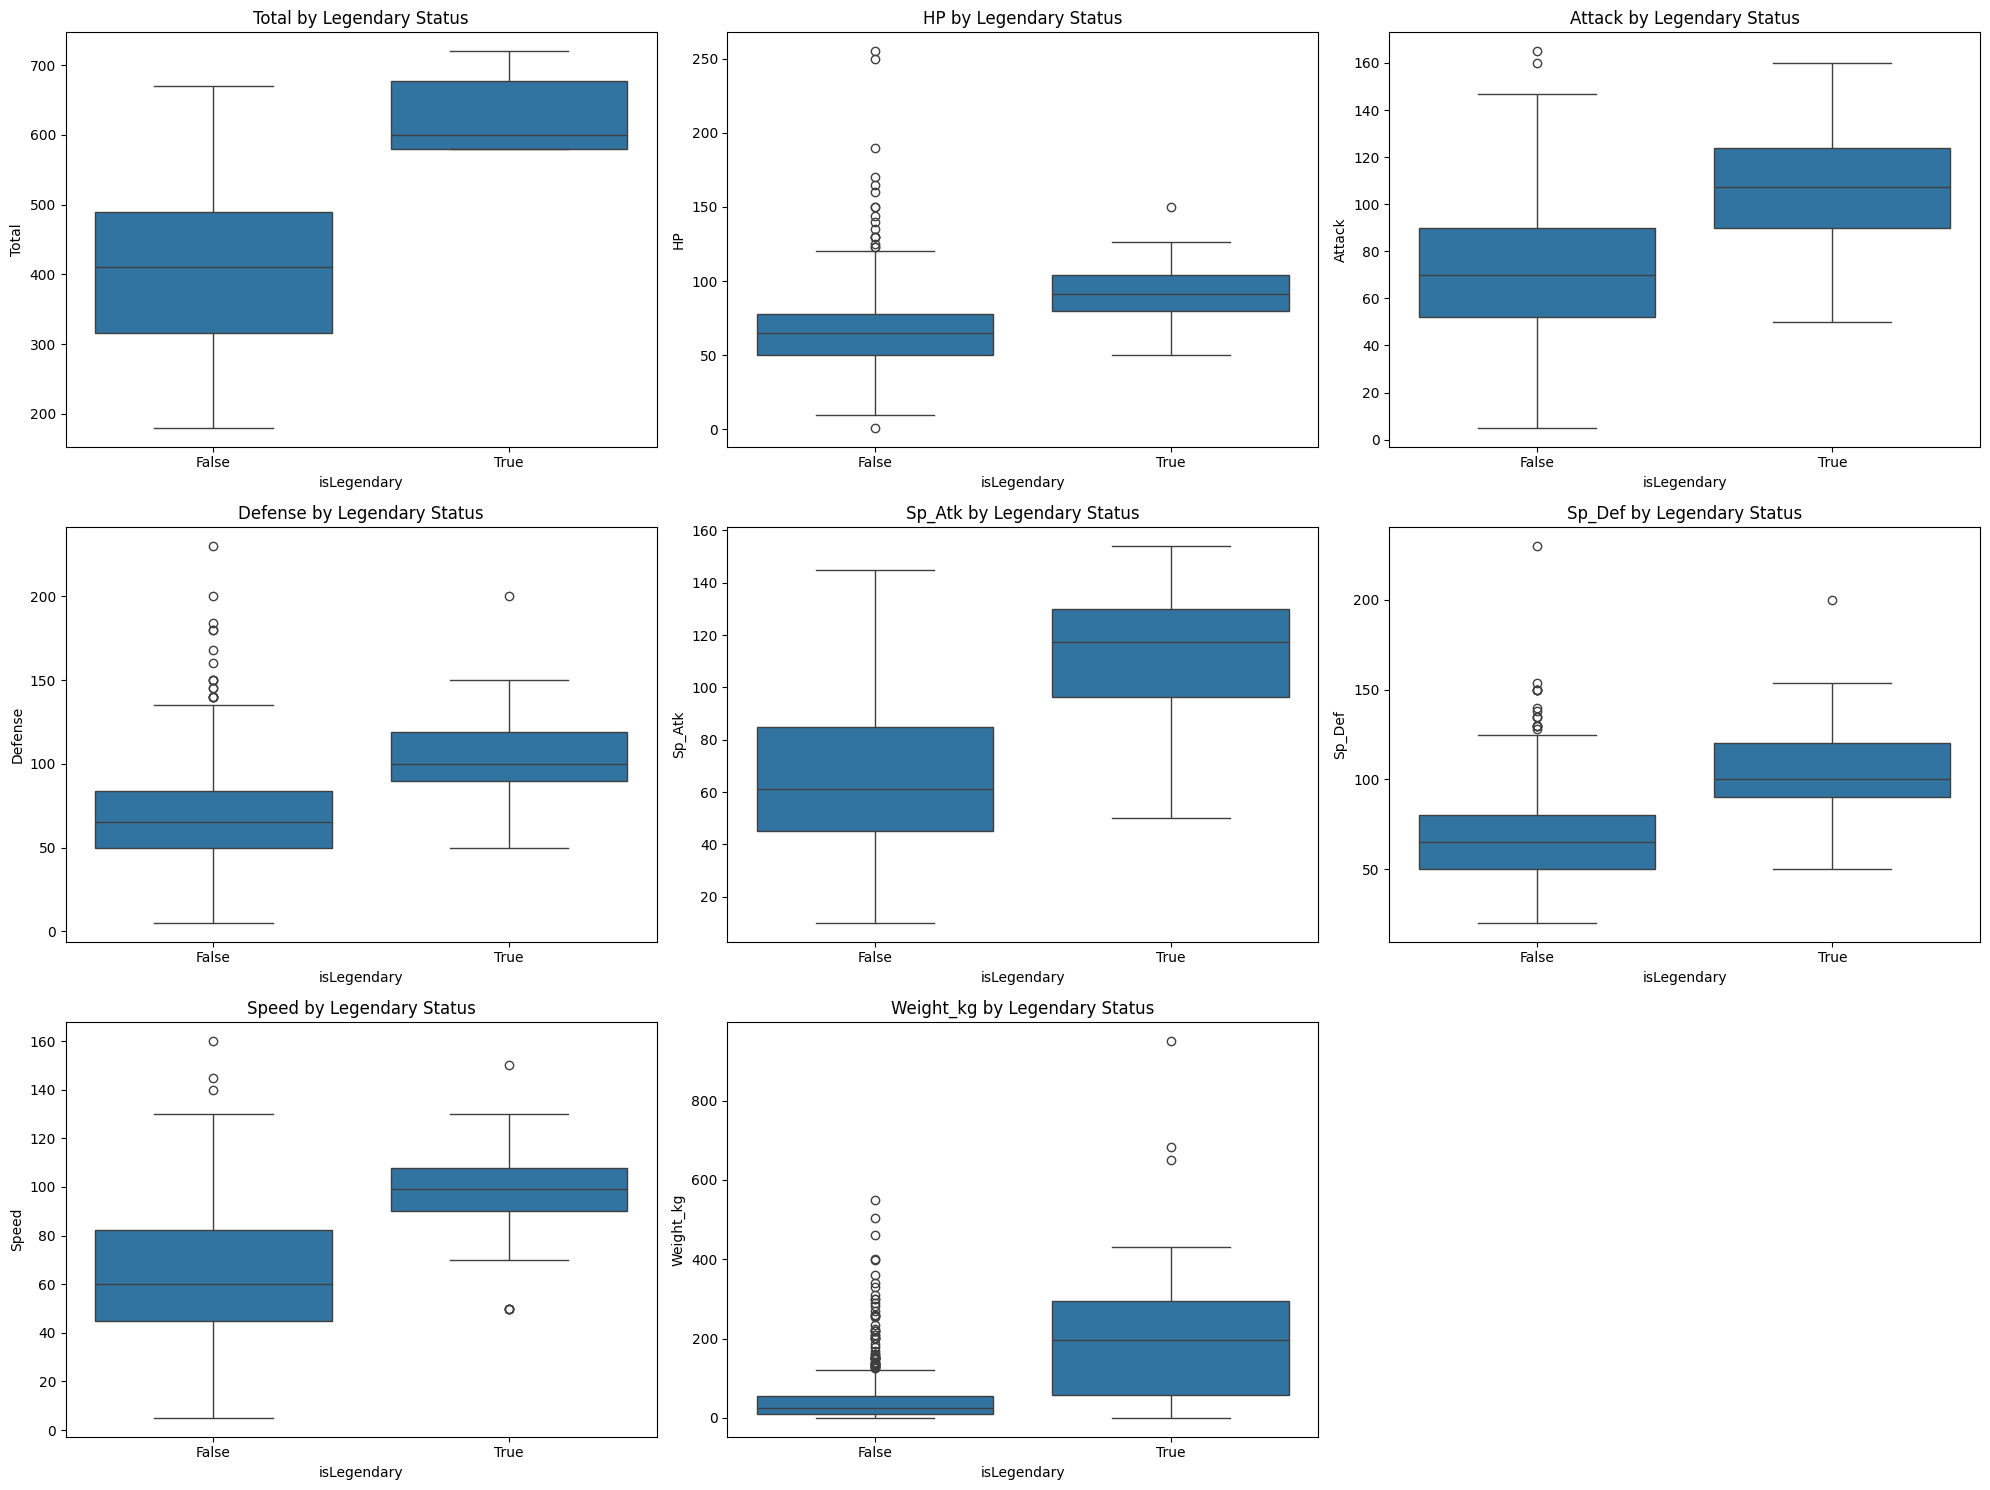

In [ ]:
plt.figure(figsize=(20, 15))

# List of numeric features to visualize
numeric_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Weight_kg']

# Creating distribution plots
for index, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, index)
    sns.histplot(pokemon_df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Creating box plots for the same features
plt.figure(figsize=(20, 15))

for index, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, index)
    sns.boxplot(x=pokemon_df['isLegendary'], y=pokemon_df[feature])
    plt.title(f'{feature} by Legendary Status')

plt.tight_layout()
plt.show()

<ipython-input-11-f63ac0cd37ae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pokemon_df.corr()


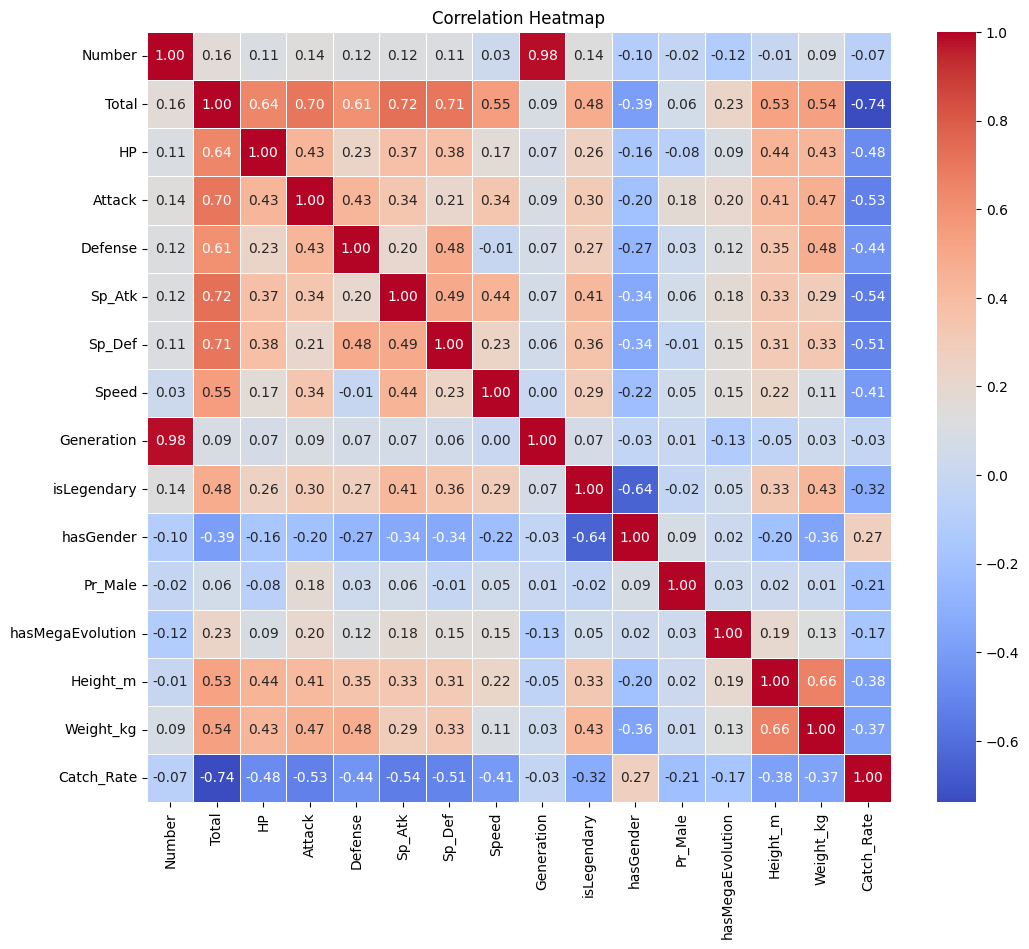

In [ ]:
# Calculating the correlation matrix
correlation_matrix = pokemon_df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

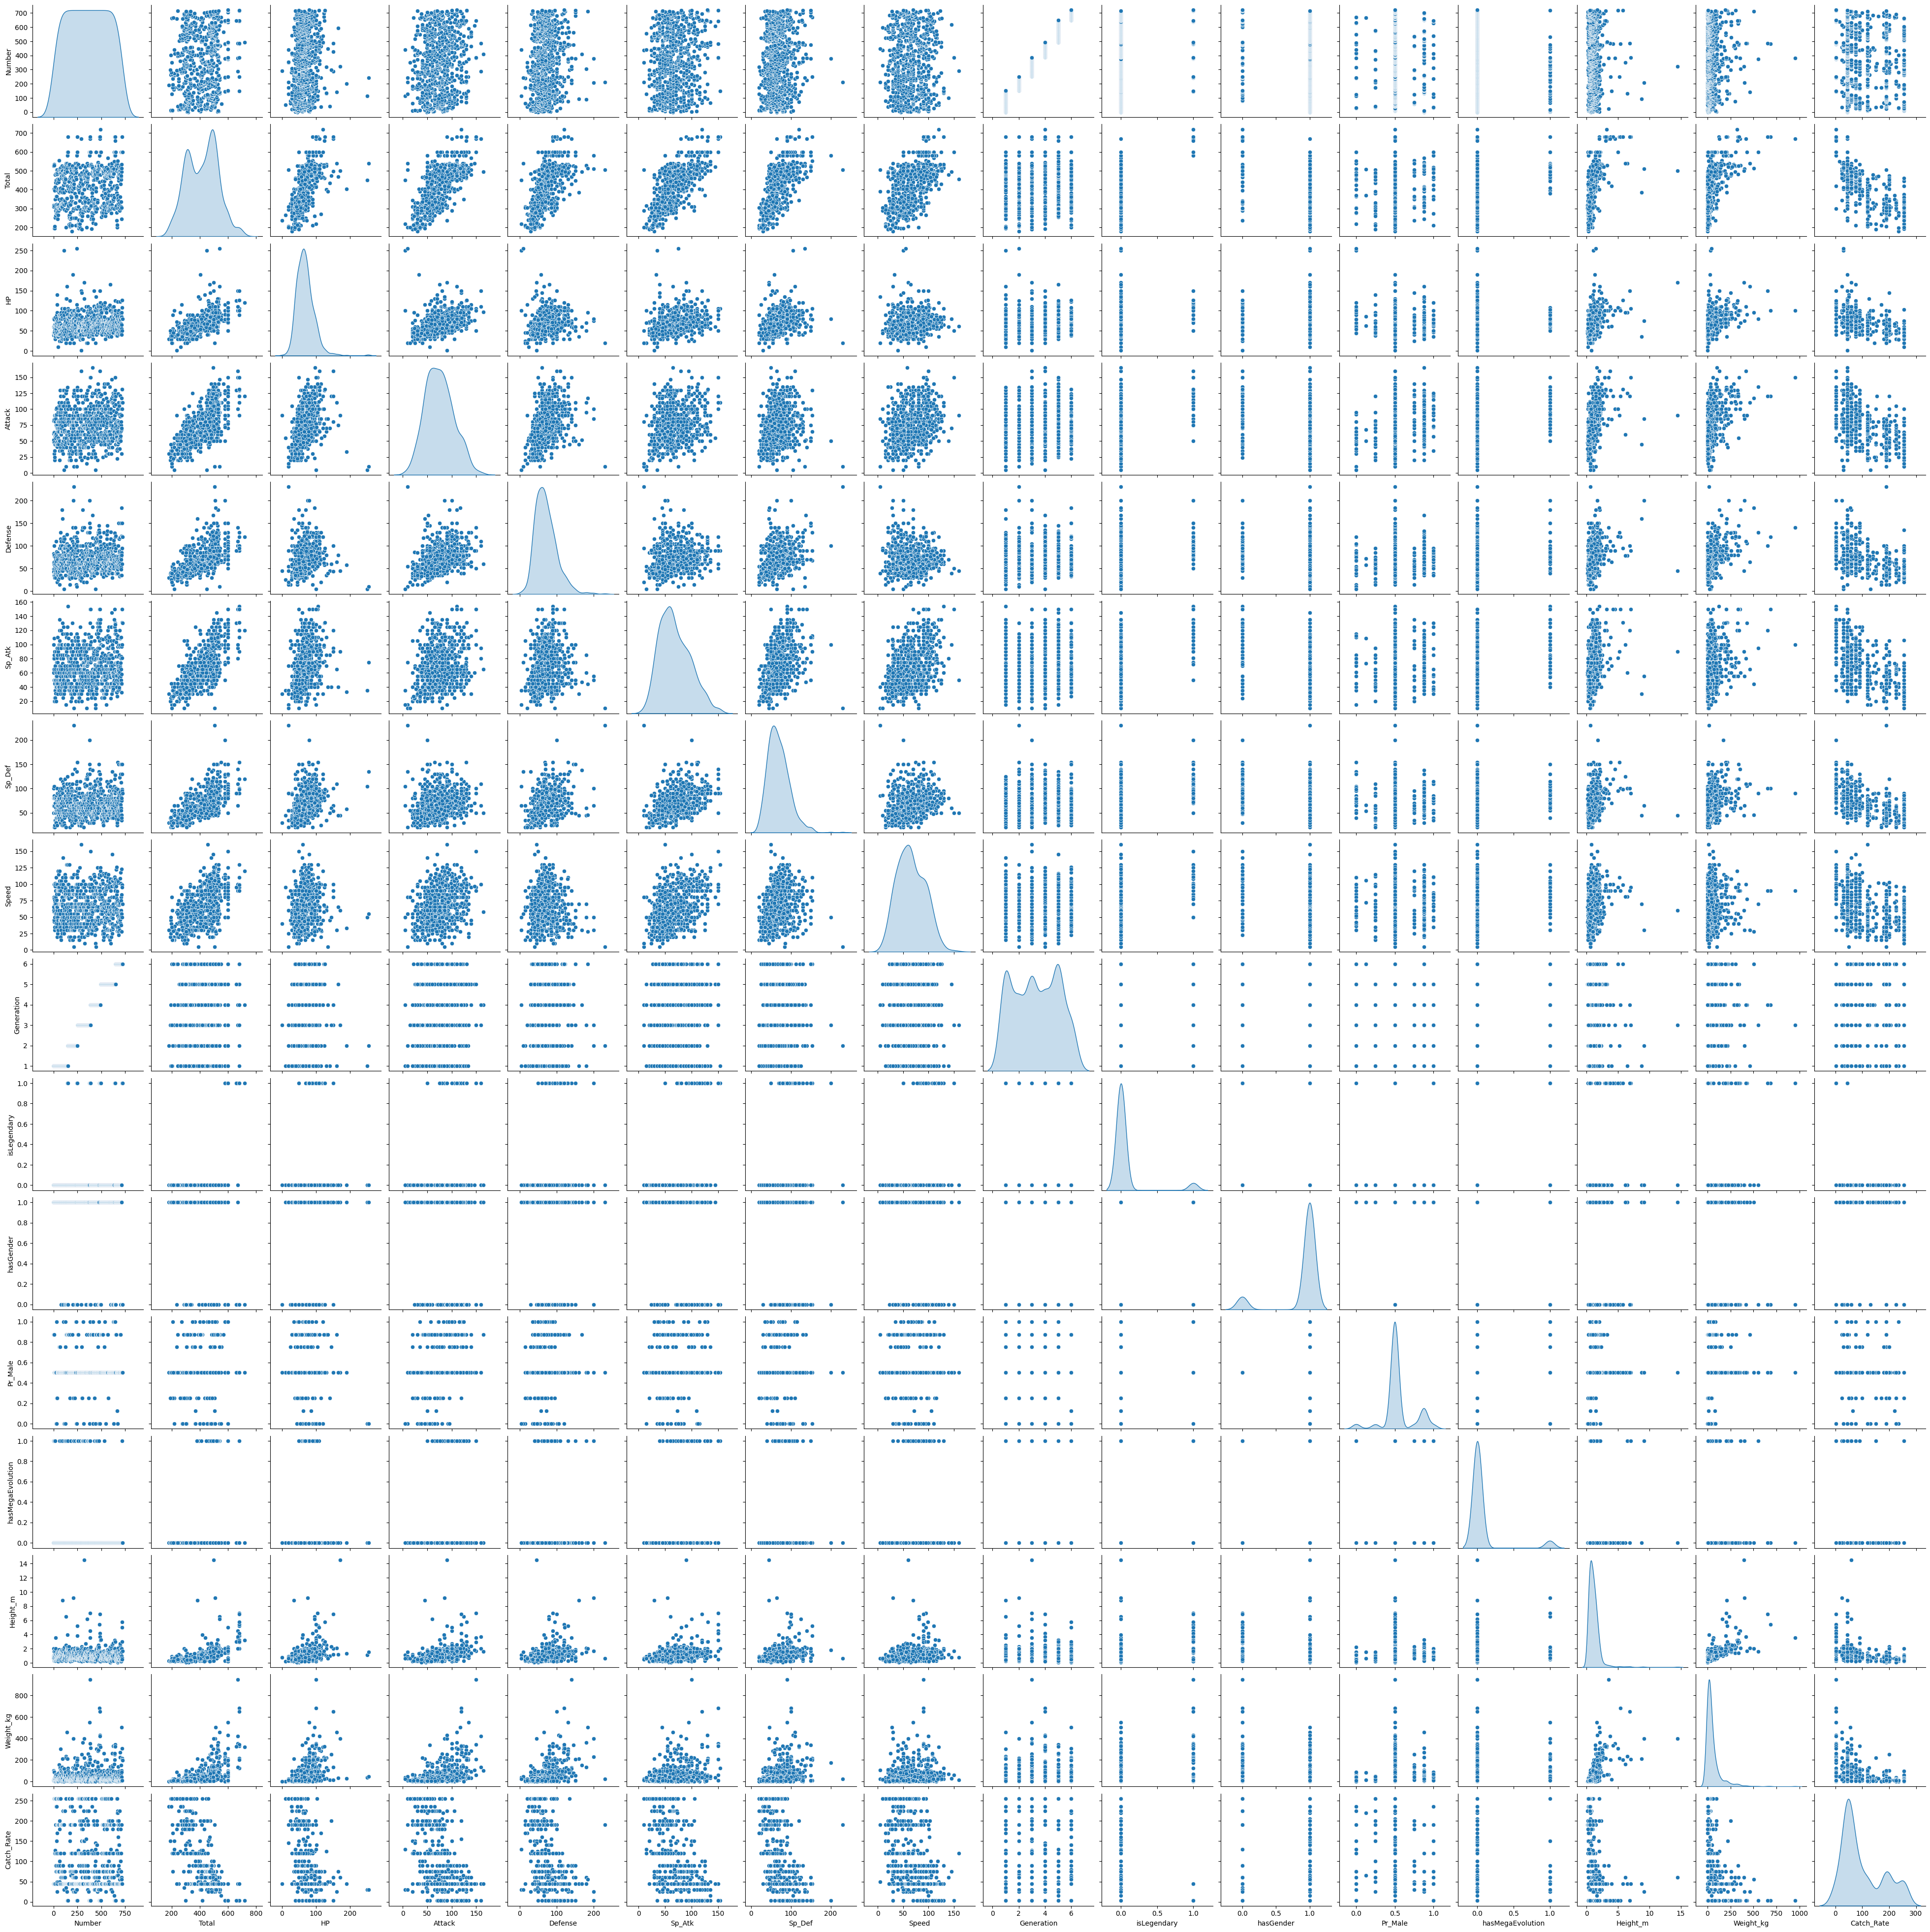

In [ ]:
sns.pairplot(pokemon_df, diag_kind='kde')
plt.show()

The selection of features such as 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', and 'Generation' for predicting a Pokémon's legendary status is based on a combination of domain knowledge and the characteristics of the dataset. Let's delve into a detailed explanation supported by data visualizations and interpretations for each chosen feature:

Type_1 and Type_2: Pokémon types are fundamental attributes that define their strengths, weaknesses, and overall battle strategies. Types can give insight into the potential rarity or uniqueness of a Pokémon, which might correlate with legendary status.


Total: This is the sum of all combat stats of a Pokémon, providing a single metric of overall strength. Legendary Pokémon are often characterized by higher total stats, reflecting their rare and powerful nature.


HP (Hit Points): Indicates how much damage a Pokémon can take before fainting. Higher HP could be indicative of stronger or more resilient Pokémon, attributes often associated with legendaries.


Attack and Defense: These stats determine how much damage a Pokémon can inflict and resist, respectively. Legendary Pokémon typically have higher attack and defense values, signifying their superior combat capabilities.


Sp_Atk and Sp_Def (Special Attack and Special Defense): Similar to Attack and Defense but for special moves. Legendary Pokémon often excel in these areas as well, showcasing their ability to deliver powerful special attacks and withstand them.


Speed: Determines the order of actions in battles. Higher speed can give Pokémon an advantage in battle, a trait that might be more common among legendary Pokémon to reflect their exceptional prowess.


Generation: The introduction generation of a Pokémon. This feature can provide contextual information, as certain generations might have introduced more powerful or legendary Pokémon compared to others.

# Handling missing values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Handling missing values
# For 'Type_2', fill missing values with 'None'
pokemon_df['Type_2'].fillna('None', inplace=True)

# For 'Pr_Male', since it's a ratio, we can fill missing values with the median
pokemon_df['Pr_Male'].fillna(pokemon_df['Pr_Male'].median(), inplace=True)

# Feature Selection excluding 'Catch_Rate'
features = ['Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']

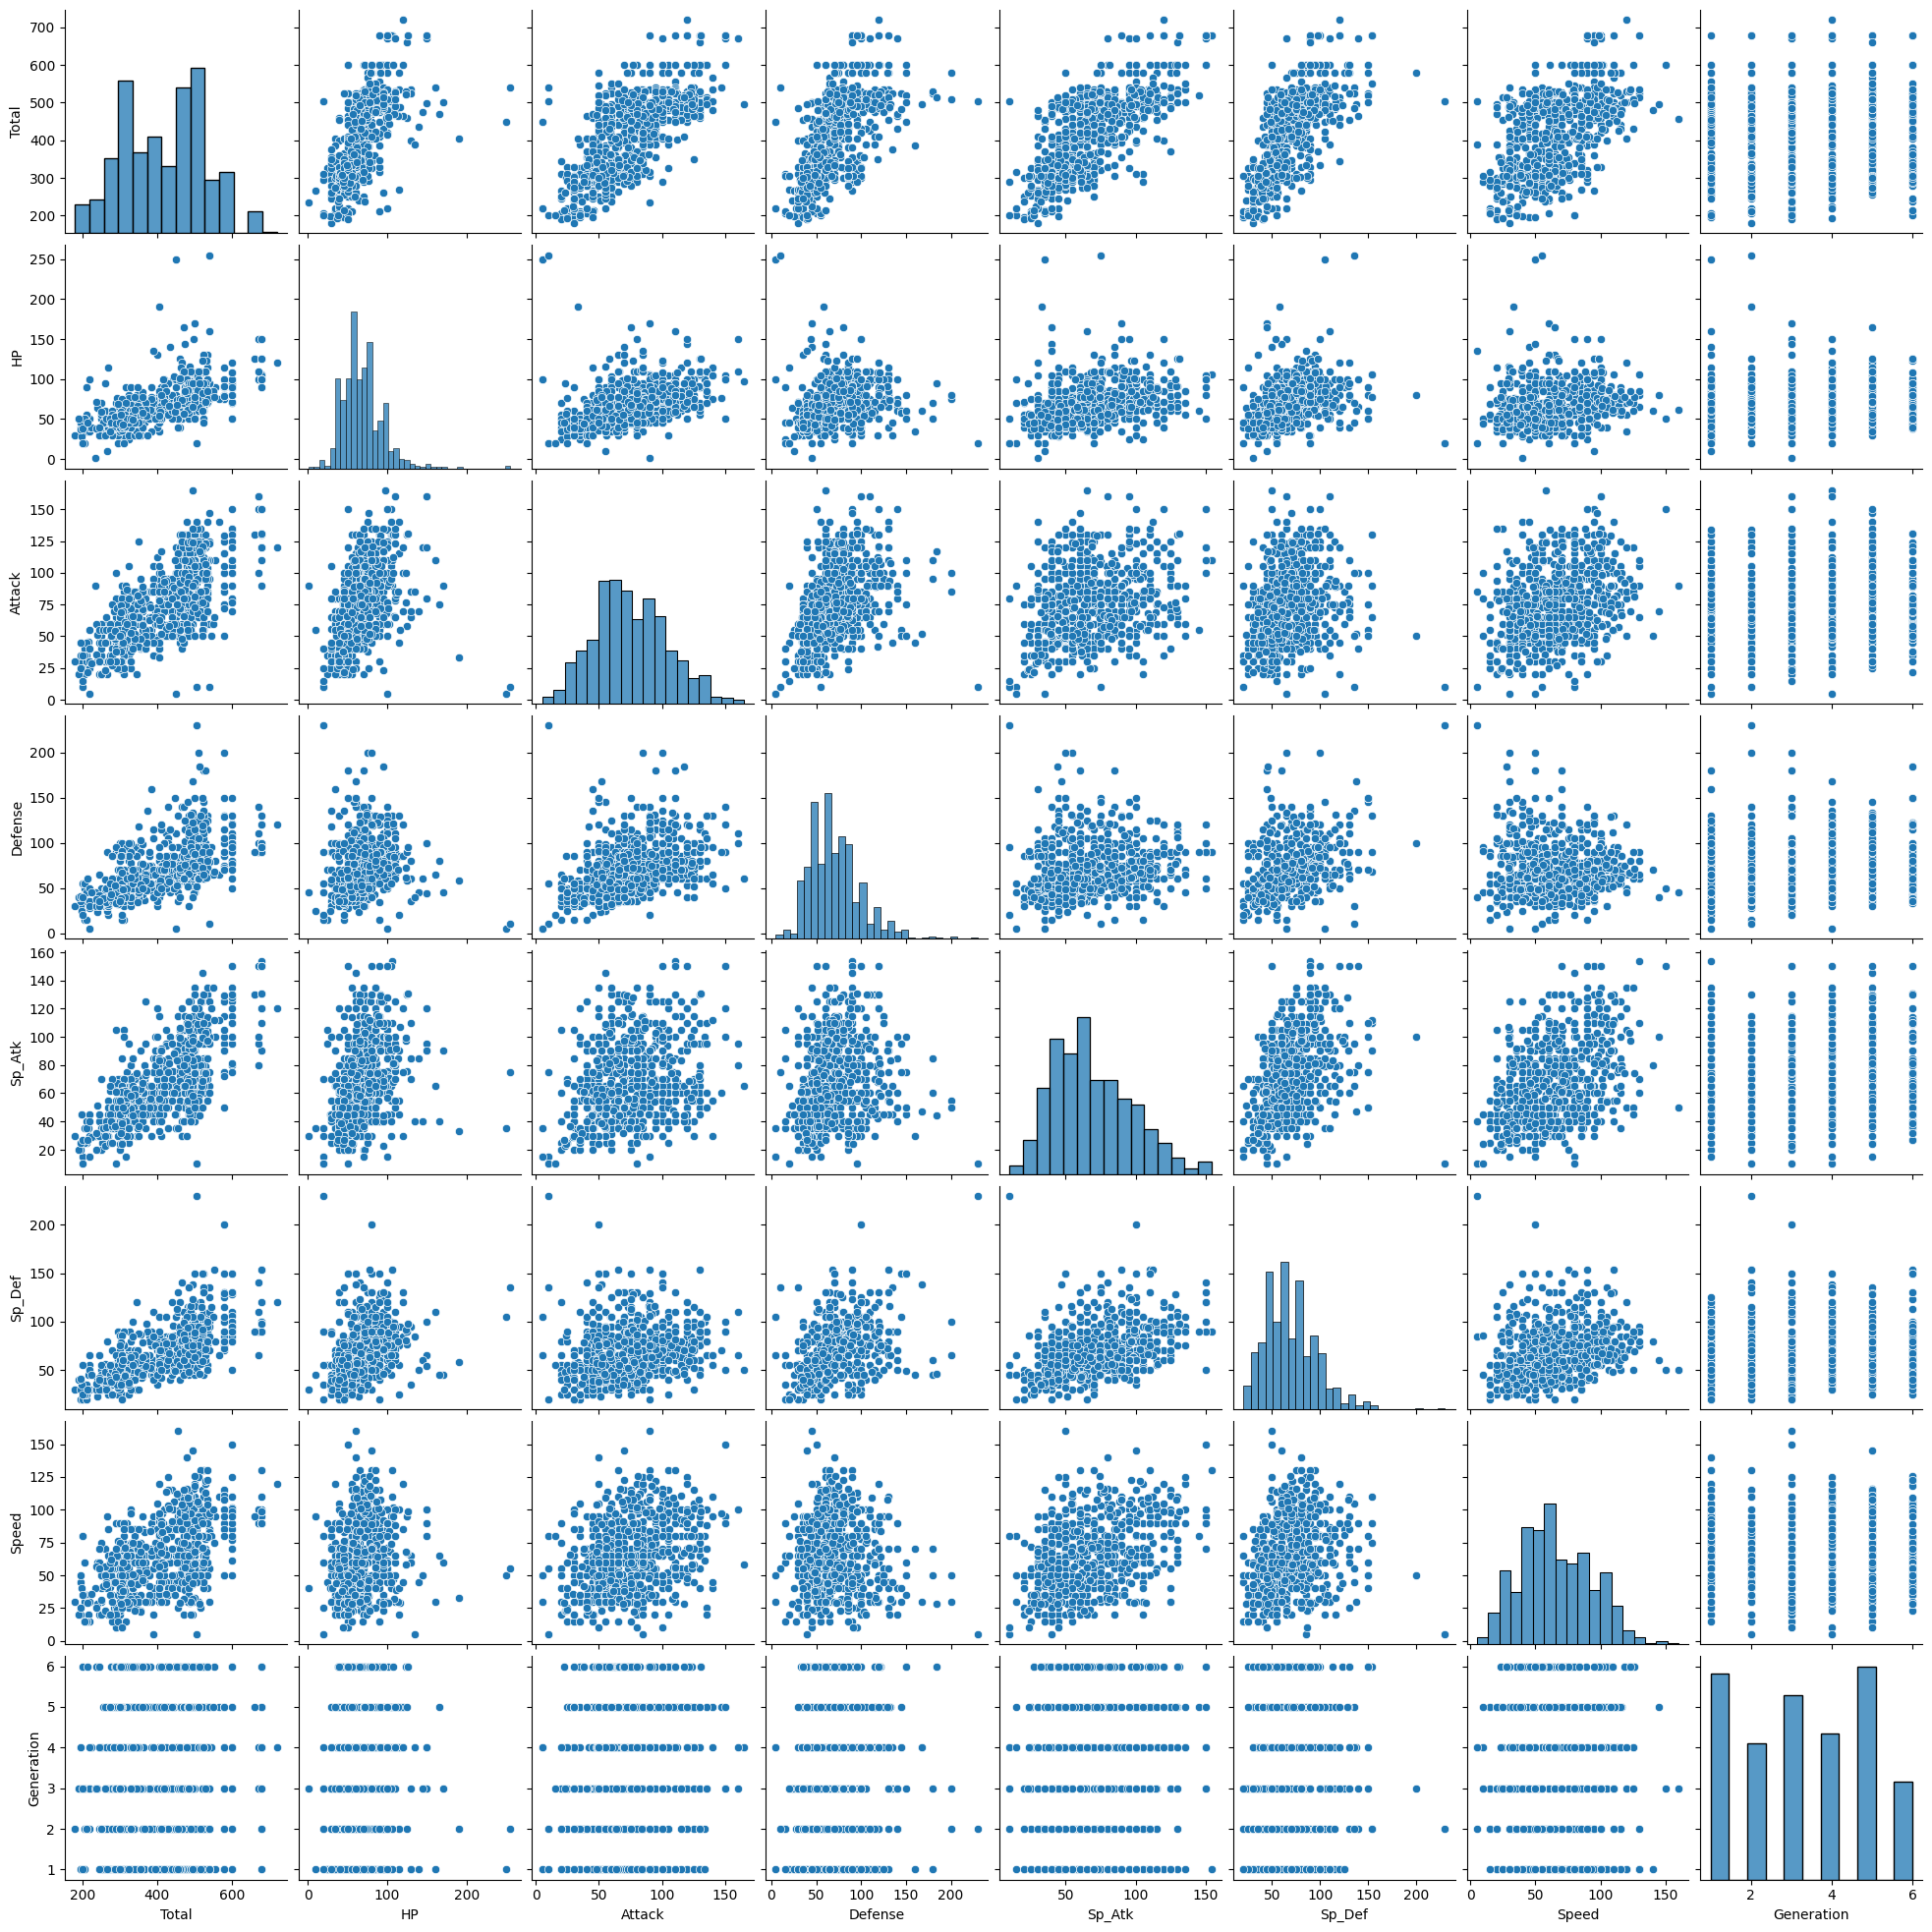

In [ ]:
sns.pairplot(pokemon_df[features])
plt.show()

Combat Stats and Total: High combat stats and 'Total' values are strong indicators of a Pokémon's legendary status, reflecting their design as more powerful entities within the game.

Pokémon Types: Certain types are more likely to be associated with legendary Pokémon, suggesting a thematic or narrative significance tied to these elements.


Generational Trends: The distribution of legendary Pokémon across generations offers a historical perspective on their introduction patterns, which can be useful for understanding game design and development trends over time.

# Data Visualization Plots

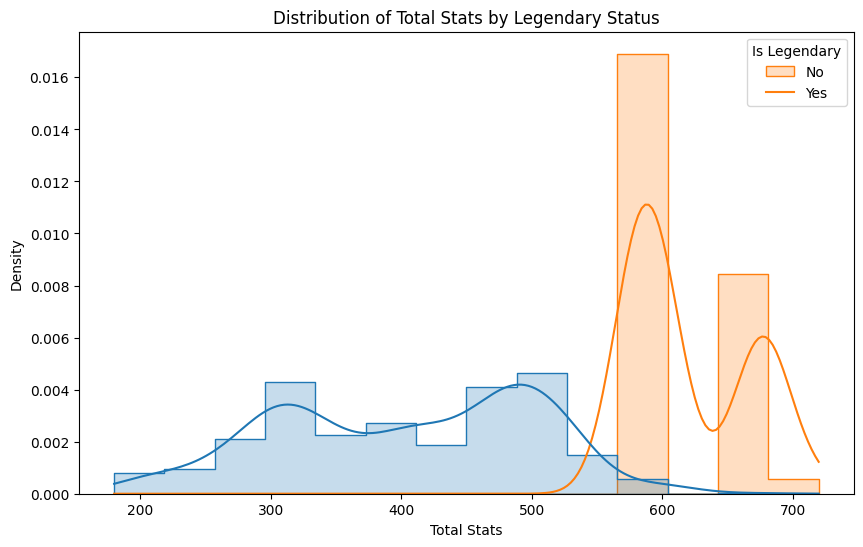

In [ ]:
# Distribution of 'Total' stats for legendary vs. non-legendary Pokémon
plt.figure(figsize=(10, 6))
sns.histplot(data=pokemon_df, x='Total', hue='isLegendary', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Total Stats by Legendary Status')
plt.xlabel('Total Stats')
plt.ylabel('Density')
plt.legend(title='Is Legendary', labels=['No', 'Yes'])
plt.show()


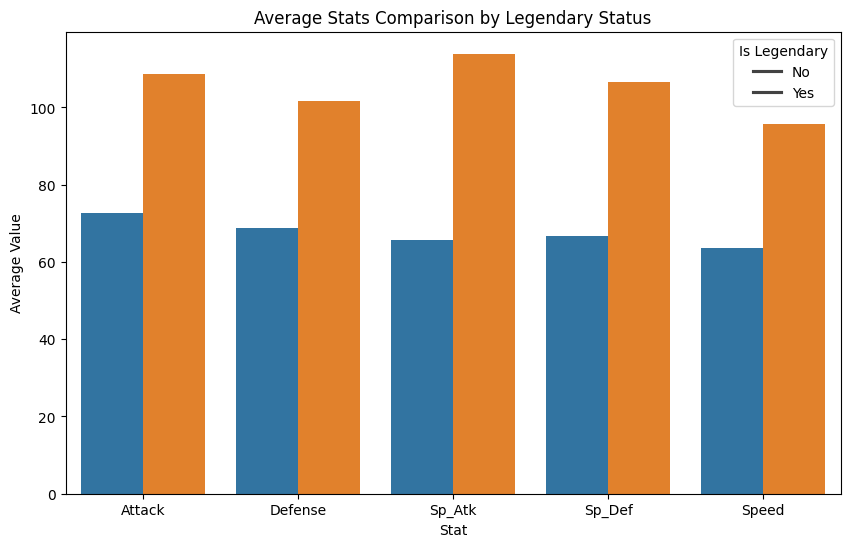

In [ ]:
# Average stats comparison for Attack, Defense, Sp_Atk, Sp_Def, and Speed
avg_stats = pokemon_df.groupby('isLegendary')[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']].mean().reset_index()
avg_stats_melted = pd.melt(avg_stats, id_vars=["isLegendary"], var_name="Stat", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stats_melted, x='Stat', y='Value', hue='isLegendary')
plt.title('Average Stats Comparison by Legendary Status')
plt.xlabel('Stat')
plt.ylabel('Average Value')
plt.legend(title='Is Legendary', labels=['No', 'Yes'])
plt.show()


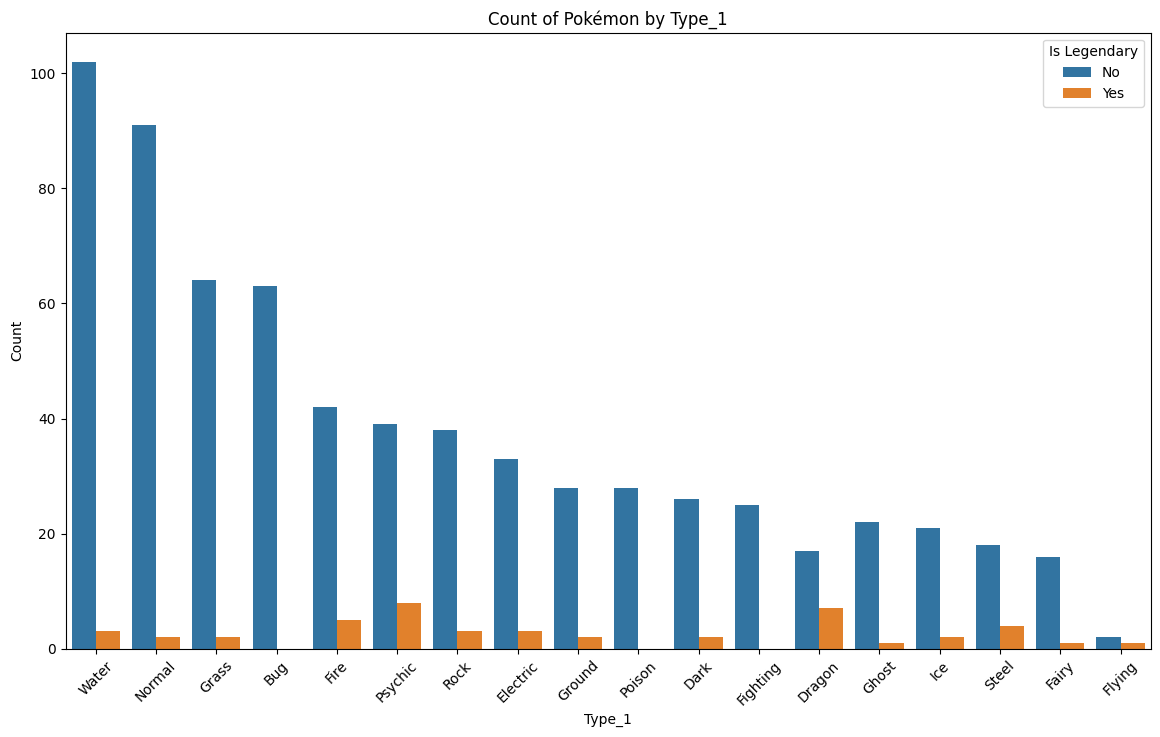

In [ ]:
# Count of Pokémon by 'Type_1' for legendary vs. non-legendary
plt.figure(figsize=(14, 8))
sns.countplot(data=pokemon_df, x='Type_1', hue='isLegendary', order=pokemon_df['Type_1'].value_counts().index)
plt.title('Count of Pokémon by Type_1')
plt.xlabel('Type_1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Legendary', labels=['No', 'Yes'])
plt.show()


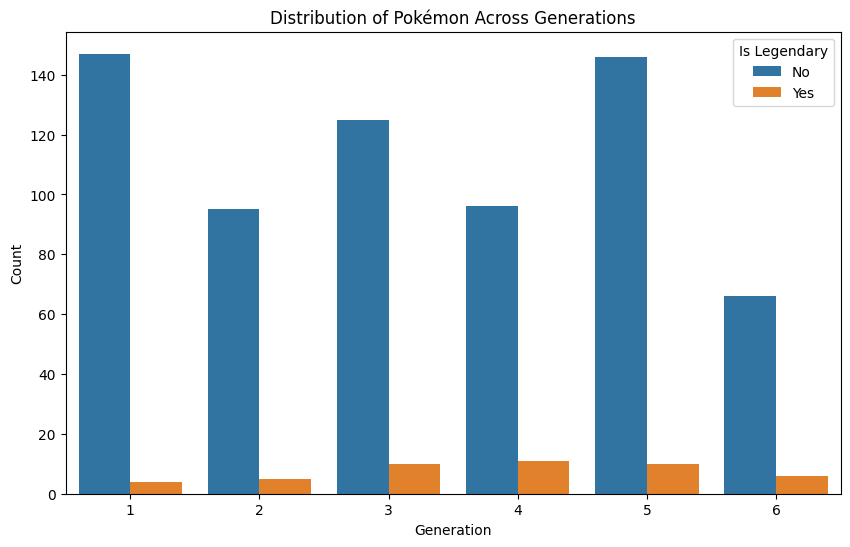

In [ ]:
# Distribution of Pokémon across generations
plt.figure(figsize=(10, 6))
sns.countplot(data=pokemon_df, x='Generation', hue='isLegendary')
plt.title('Distribution of Pokémon Across Generations')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.legend(title='Is Legendary', labels=['No', 'Yes'])
plt.show()

Distribution of Total Stats by Legendary Status

Observation: The density plot shows that legendary Pokémon generally have higher total stats compared to non-legendary Pokémon. This distinction supports the choice of 'Total' as a critical feature, indicating overall power and rarity.


Average Stats Comparison by Legendary Status

Observation: Legendary Pokémon have higher average values across all combat stats ('Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'). This pattern reinforces the relevance of these features in distinguishing between legendary and non-legendary Pokémon, as legendaries are designed to be more powerful.



Count of Pokémon by Type_1

Observation: Certain types, such as Dragon and Psychic, show a relatively higher proportion of legendary Pokémon, suggesting some types are more associated with legendary status. This observation justifies including 'Type_1' and 'Type_2' in the feature set, as they can indicate a Pokémon's rarity and unique abilities.



Distribution of Pokémon Across Generations

Observation: The count plot across generations shows that legendary Pokémon are consistently introduced in each generation, but their frequency can vary. This variability implies that 'Generation' might offer contextual clues about the likelihood of a Pokémon being legendary, reflecting design philosophies or thematic focuses of different Pokémon generations.

# Handling outliers

In [ ]:
# Assuming pokemon_df is your DataFrame and 'Total' is a feature with outliers
q_low = pokemon_df['Total'].quantile(0.01)
q_high = pokemon_df['Total'].quantile(0.99)

# Clipping outliers
pokemon_df['Total_clipped'] = pokemon_df['Total'].clip(lower=q_low, upper=q_high)
columns_to_clip = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

for column in columns_to_clip:
    lower_percentile = pokemon_df[column].quantile(0.01)
    upper_percentile = pokemon_df[column].quantile(0.99)
    pokemon_df[f'{column}_clipped'] = pokemon_df[column].clip(lower=lower_percentile, upper=upper_percentile)


# Splitting training data and testing data

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical Features

In [ ]:
# Pipeline for numerical features
numeric_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Categorical Features

In [ ]:
# Pipeline for categorical features
categorical_features = ['Type_1', 'Type_2']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Data Pre Processing

In [ ]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Logistic regression pipeline and fitting the model

In [ ]:
# Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000, random_state=42))])
# Training the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Total', 'HP', 'Attack',
                                                   'Defense', 'Sp_Atk',
                                                   'Sp_Def', 'Speed',
                                                   'Generation']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type_1', 'Type_2'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# coefficients of the logistic expression

In [ ]:
# Assuming clf is your logistic regression pipeline and it has been fitted
coefficients = clf.named_steps['classifier'].coef_[0]

# Assuming preprocessoris correctly set up
feature_names = preprocessor.transformers_[0][2] + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

# Creating a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the coefficients by their absolute values to see the most influential features
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

# Displaying the top 10 features for simplicity
print(coefficients_df.head(10))


      Feature  Coefficient
0       Total     1.692494
6       Speed     1.501801
3     Defense     1.458807
5      Sp_Def     1.301805
4      Sp_Atk     1.257345
20  x0_Normal    -0.872973
2      Attack     0.824464
25   x0_Water    -0.788637
8      x0_Bug    -0.705974
14    x0_Fire     0.698501


# Cross Validation and Perfomance metrics

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cross_val_accuracy = cross_val_score(clf, X, y, cv=5).mean()
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, cross_val_accuracy, conf_matrix, class_report

(0.9655172413793104,
 0.9584003831417626,
 array([[135,   2],
        [  3,   5]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       137\n           1       0.71      0.62      0.67         8\n\n    accuracy                           0.97       145\n   macro avg       0.85      0.81      0.82       145\nweighted avg       0.96      0.97      0.96       145\n')

In [ ]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Cross-Validation Accuracy", "Confusion Matrix", "Classification Report"],
    "Value": [accuracy, cross_val_accuracy, str(conf_matrix), class_report]
})

# Adjusting the display options to ensure the classification report is fully visible
pd.set_option('display.max_colwidth', None)

metrics_df

Metric  \
0                   Accuracy   
1  Cross-Validation Accuracy   
2           Confusion Matrix   
3      Classification Report   

                                                                                                                                                                                                                                                                                                                                            Value  
0                                                                                                                                                                                                                                                                                                                                        0.965517  
1                                                                                                                                                                                                                                                                                                                                          0.9584  
2                                                                                                                                                                                                                                                                                                                         [[135   2]\n [  3   5]]  
3                precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       137\n           1       0.71      0.62      0.67         8\n\n    accuracy                           0.97       145\n   macro avg       0.85      0.81      0.82       145\nweighted avg       0.96      0.97      0.96       145\n

# Conclusion

Accuracy: The model correctly predicts the legendary status of Pokémon 96.55% of the time on the test set.


Cross-Validation Accuracy: When validated across different subsets, the model achieves an average accuracy of 95.84%.


Confusion Matrix: Indicates that out of the total test set,


135 non-legendary Pokémon were correctly identified (True Negatives),


2 non-legendary Pokémon were incorrectly identified as legendary (False Positives),


3 legendary Pokémon were incorrectly identified as non-legendary (False Negatives),


5 legendary Pokémon were correctly identified (True Positives).




Classification Report: Provides a breakdown of precision, recall, and F1-score across both classes (legendary and non-legendary), showing particularly high performance for non-legendary predictions and a good, albeit lower, performance for legendary Pokémon predictions.